In [4]:
    try:
        from google.colab import drive

        print('Colab environment detected. Mounting drive...')
        drive.mount('/content/drive')

        print('Mounted. Switching to directory... ', end = '')
        %cd /content/drive/'My Drive'/CILroadseg
        print('done.')
    except:
        print('Colab environment not found. Working on ordinary directory.')

Colab environment detected. Mounting drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted. Switching to directory... /content/drive/My Drive/CILroadseg
done.


In [0]:
import numpy as np
import sys
import os
import matplotlib.image as mpimg

from util.submit import *
from util.helpers import *
from util.visualize import *
from util.notebooks import *
from util.cross_validation import cross_validate

## Loading Training Data

In [6]:
train_dir = "training/images/"
gt_dir = "training/groundtruth/"
test_dir = "test/images/"

X, Y, X_test = nb_load_data(train_dir, gt_dir, test_dir)

Loading training input...
Progress: done (100 images).
Loading training groundtruth...
Progress: done (100 images).
Loading test input...
Progress: done (94 images).

       Training data shape: (100, 400, 400, 3)
Training groundtruth shape: (100, 400, 400)
           Test data shape: (94, 608, 608, 3)


## Decomposer + ResNet/CNN

In [7]:
import tensorflow as tf
from tensorflow import keras

from decomposer import *
from zero_classifier import *
from resnet import *
from cnn_trial_alessia import *
from cnn import *

Using TensorFlow backend.


In [0]:
model = Decomposer(cnn_trial()) #Decomposer(CNNModel())

In [9]:
choice = 'cv'

np.random.seed(1) #fix randomness
if choice == 'cv':
  cross_validate(model, 4, X, Y)

elif choice == 'tr':
  model.initialize()
  model.train(Y, X) 

else:
  model.load("saves/final/cnn.h5")

Fold #1: 
    Accuracy: 0.78881675
Mean F Score: 0.0
Fold #2: 
    Accuracy: 0.809346
Mean F Score: 0.0
Fold #3: 
    Accuracy: 0.78656225
Mean F Score: 0.0
Fold #4: 
    Accuracy: 0.79631375
Mean F Score: 0.0

Cross Validation done:

Accuracy: [0.78881675 0.809346   0.78656225 0.79631375]
AVG: 0.7952596875
STD: 0.008897922654991945

F Score: [0. 0. 0. 0.]
AVG: 0.0
STD: 0.0



## Model Saving

In [11]:
weights_file = "saves/final/zero.h5"

nb_save_model(model, weights_file)

[Target file: saves/final/zero.h5]
Saving model to disk...done.


In [14]:
test_masks_dir = "test/pred/"
test_dir = "test/images/"

nb_predict_masks(model, test_dir, test_masks_dir)

Predicting test cases... 
Progress: 100%Progress: done.


In [0]:
image_paths = [test_masks_dir + file for file in os.listdir(test_masks_dir)]

masks_to_submission("test/pred/cnn.csv", image_paths)

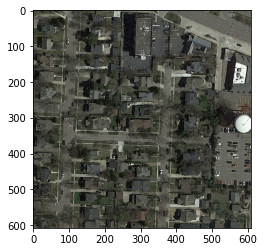

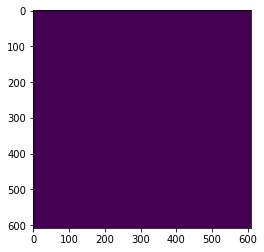

In [19]:
Y_pred = model.classify(X_test[0:10])

view_image_mask(X_test[4], Y_pred[4])